We will conduct some statistical analysis of long-term daily financial data, namely the prices of the following market indices: 

1) S&P 500 from March 1957 to October 2023, i.e., 66.5 years
2) Dow Jones Industrial Average from February 1900 to October 2023, i.e., 123.5 years.

We will attempt to see some properties of the distributions of their price changes and compare them to those of a process whose changes follow a normal Gaussian distribution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels as st
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
filepath1='S&P500 - 030457-102023(csv).csv'
df1=pd.read_csv(filepath1)

df1['Pricing Date'] = pd.to_datetime(df1['Pricing Date'])

df1 = df1.sort_values(by='Pricing Date')

df1 = df1.reset_index(drop=True)

df1.rename(columns={'S&P 500 Price Return-Index Value (Daily)': 'SP500 Price'}, inplace=True)
df1.rename(columns={'Pricing Date': 'SP500 Date'}, inplace=True)

print(df1)

      SP500 Date SP500 Price
0     1957-03-04       44.06
1     1957-03-05       44.22
2     1957-03-06       44.33
3     1957-03-07       44.21
4     1957-03-08       44.07
...          ...         ...
16773 2023-10-16    4,373.63
16774 2023-10-17    4,373.20
16775 2023-10-18    4,314.60
16776 2023-10-19    4,278.00
16777 2023-10-20    4,234.47

[16778 rows x 2 columns]


In [3]:
filepath2='DJIA - 02021900-10202023(csv).csv'
df2=pd.read_csv(filepath2)

df2['Pricing Date'] = pd.to_datetime(df2['Pricing Date'])

df2 = df2.sort_values(by='Pricing Date')

df2 = df2.reset_index(drop=True)

df2.rename(columns={'Dow Jones Industrial Average Price Return-Index Value (Daily)': 'DJIA Price'}, inplace=True)
df2.rename(columns={'Pricing Date': 'DJIA Date'}, inplace=True)

print(df2)

       DJIA Date DJIA Price
0     1900-02-01      67.34
1     1900-02-02      67.86
2     1900-02-03      67.88
3     1900-02-05      68.36
4     1900-02-06      68.03
...          ...        ...
35353 2023-10-16  33,984.54
35354 2023-10-17  33,997.65
35355 2023-10-18  33,665.08
35356 2023-10-19  33,414.17
35357 2023-10-20  33,147.70

[35358 rows x 2 columns]


In [4]:
# Adding a column for log of prices

df1['SP500 Price'] = df1['SP500 Price'].str.replace(',', '').astype(float)
df1['SP500Log_price']=np.log10(df1['SP500 Price'])

df2['DJIA Price'] = df2['DJIA Price'].str.replace(',', '').astype(float)
df2['DJIALog_price']=np.log10(df2['DJIA Price'])

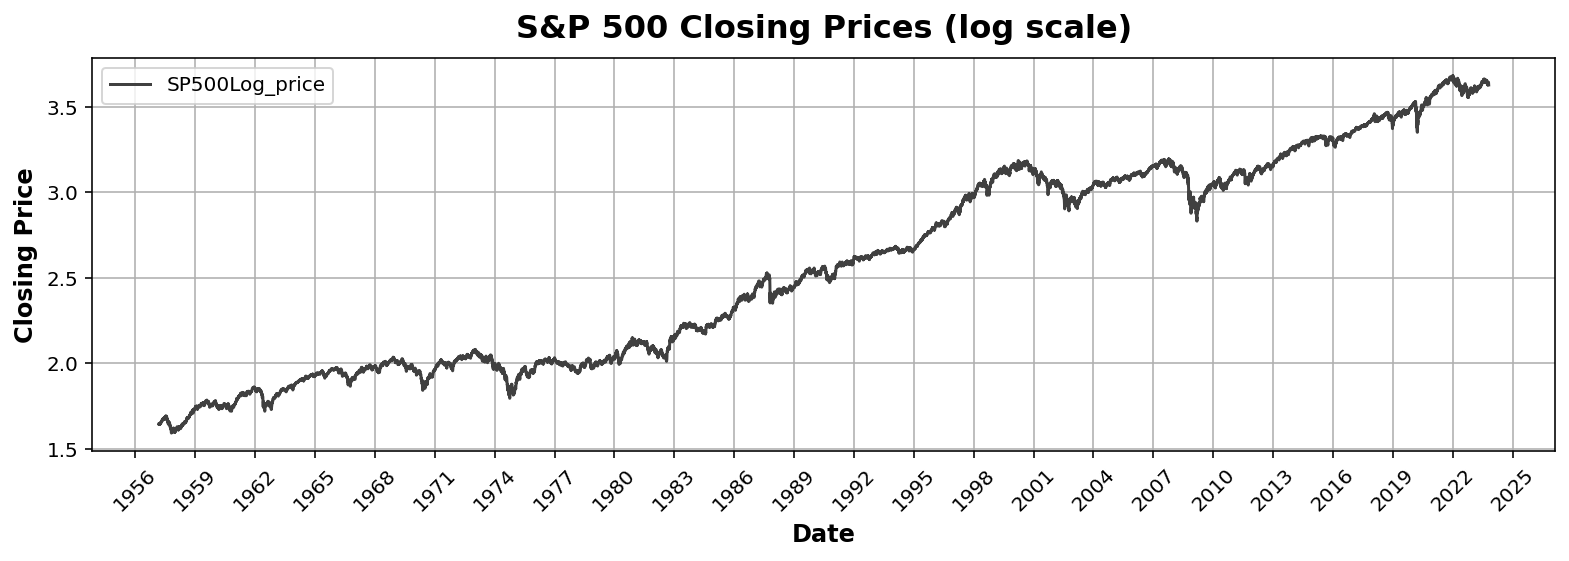

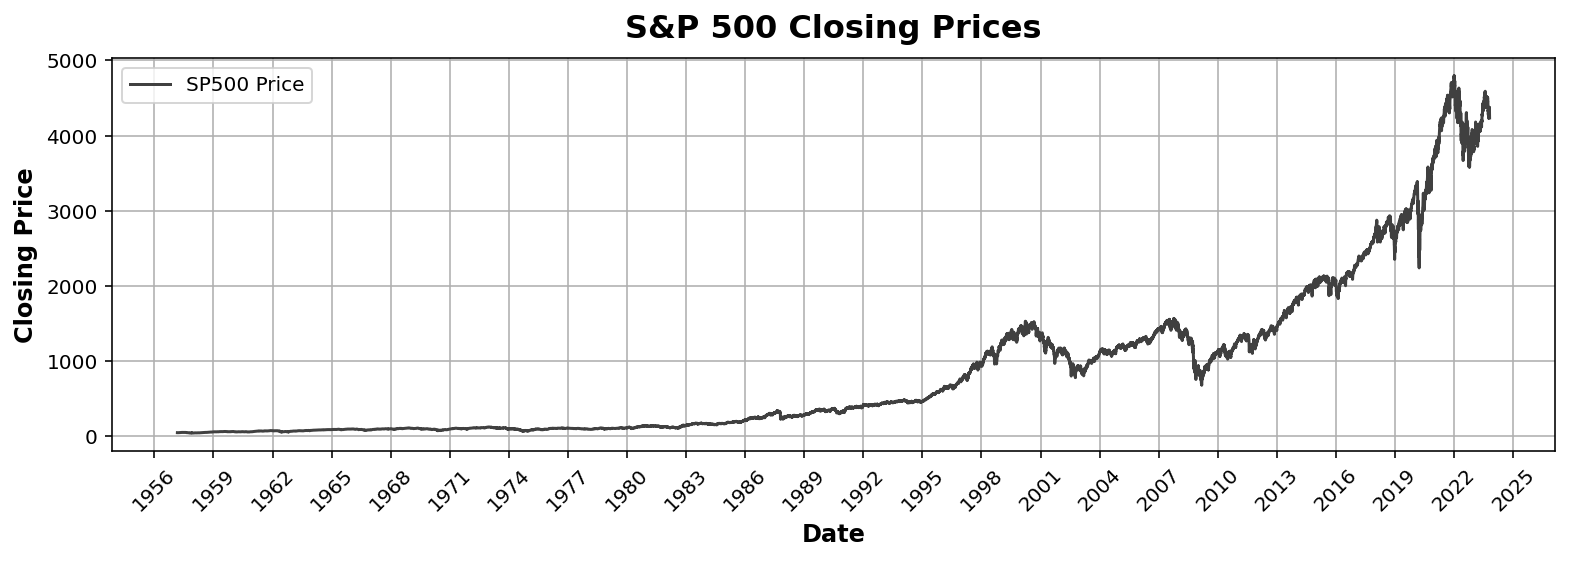

In [5]:
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('SP500 Date', 'SP500Log_price', data=df1, color='0.25')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('S&P 500 Closing Prices (log scale)')

# following few lines to show months as well
years = mdates.YearLocator(3)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

fig1, ax1 = plt.subplots()
ax1.plot('SP500 Date', 'SP500 Price', data=df1, color='0.25')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')
ax1.set_title('S&P 500 Closing Prices')

years = mdates.YearLocator(3)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

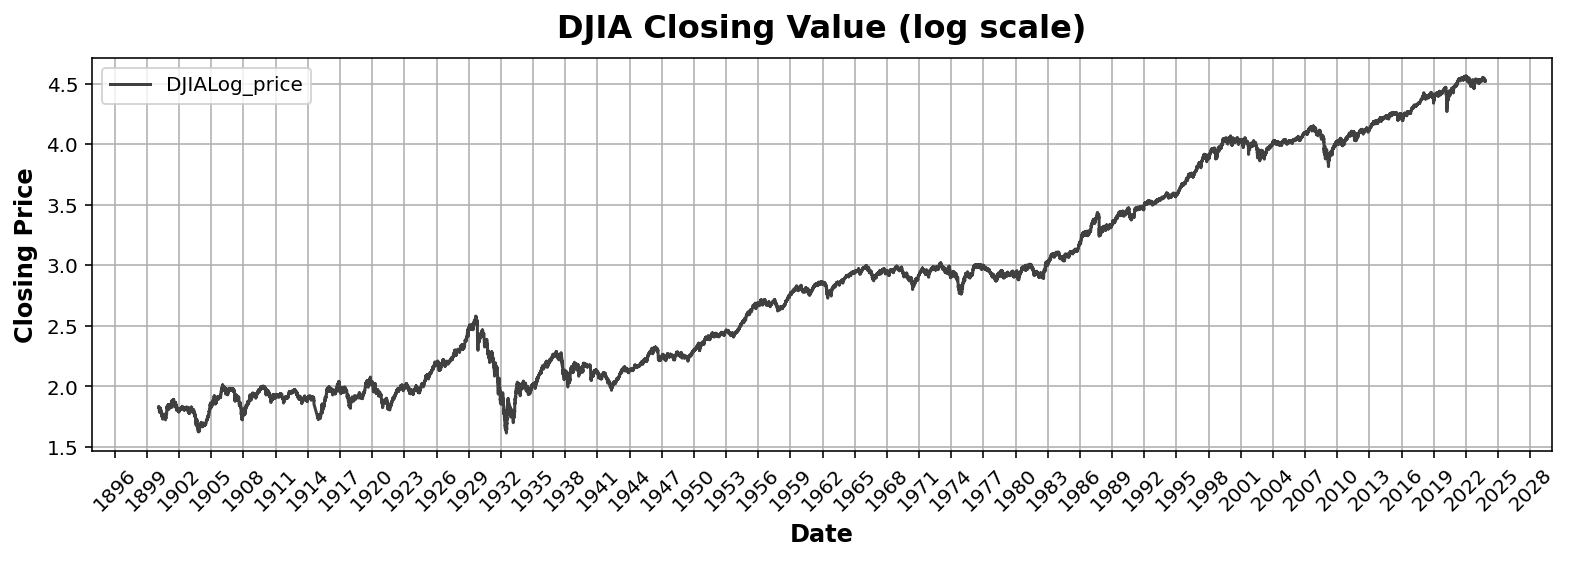

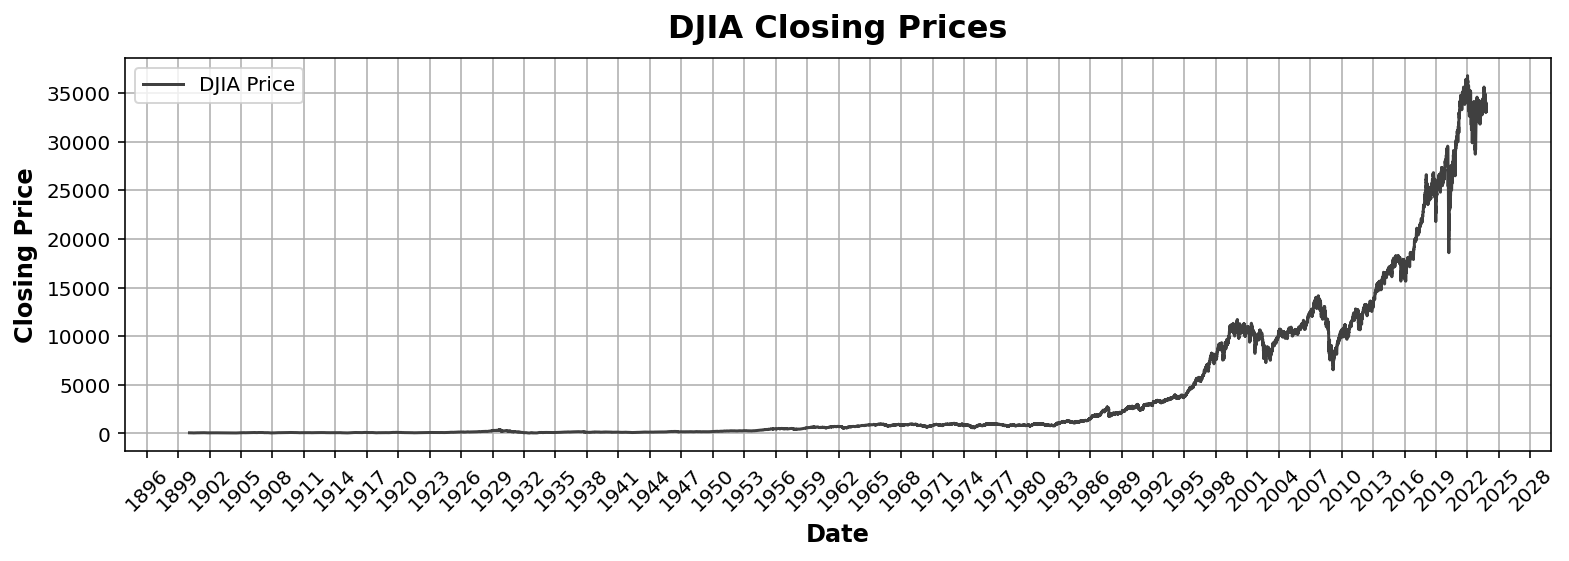

In [6]:
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('DJIA Date', 'DJIALog_price', data=df2, color='0.25')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.set_title('DJIA Closing Value (log scale)')

#date_format = mdates.DateFormatter('%Y-%m')  # Format: Year-Month
years = mdates.YearLocator(3)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

fig1, ax1 = plt.subplots()
ax1.plot('DJIA Date', 'DJIA Price', data=df2, color='0.25')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')
ax1.set_title('DJIA Closing Prices')

years = mdates.YearLocator(3)
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45) 
plt.grid(True)
plt.legend()
plt.tight_layout()

We see a lot more structure in the log plots. This is because of the scaling effect. We will see this in stark detail in later plots of daily changes. Before that, we show some realizations of a Wiener process or a Brownian motion which is commonly used to model stock prices. It is characterized by the condition that a change in the value at time *t+1* is independent of that at time *t*, and all changes follow a normal distribution. Further below, we will look at daily changes in the prices of the indices and compare them to those of a sample Brownian motion process.

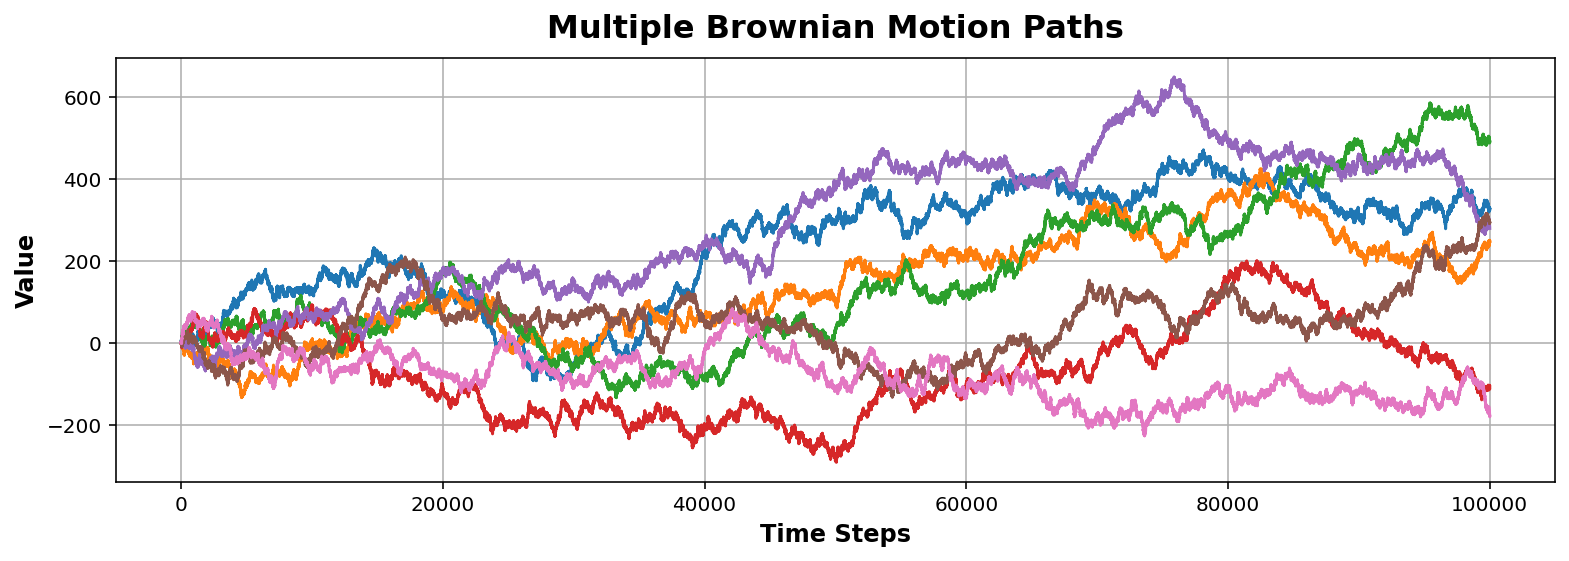

In [7]:
num_steps=100000
num_paths=7

for _ in range(num_paths):
    increments = np.random.normal(loc=0, scale=1, size=num_steps)
    brownian_motion = np.cumsum(increments)
    plt.plot(range(num_steps), brownian_motion)

# Plot settings
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.title('Multiple Brownian Motion Paths')
plt.grid(True)
plt.show()

In [10]:
df1['Percent_change']=df1['SP500 Price'].pct_change()*100
df2['Percent_change']=df2['DJIA Price'].pct_change()*100

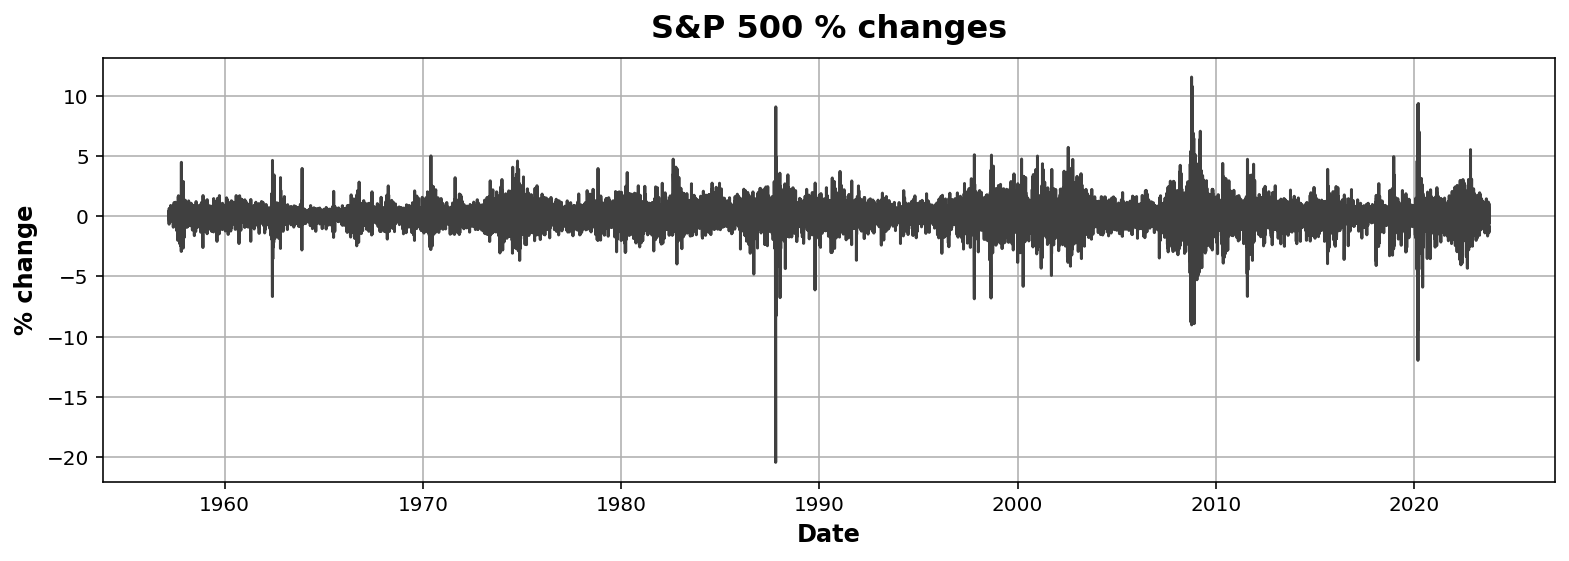

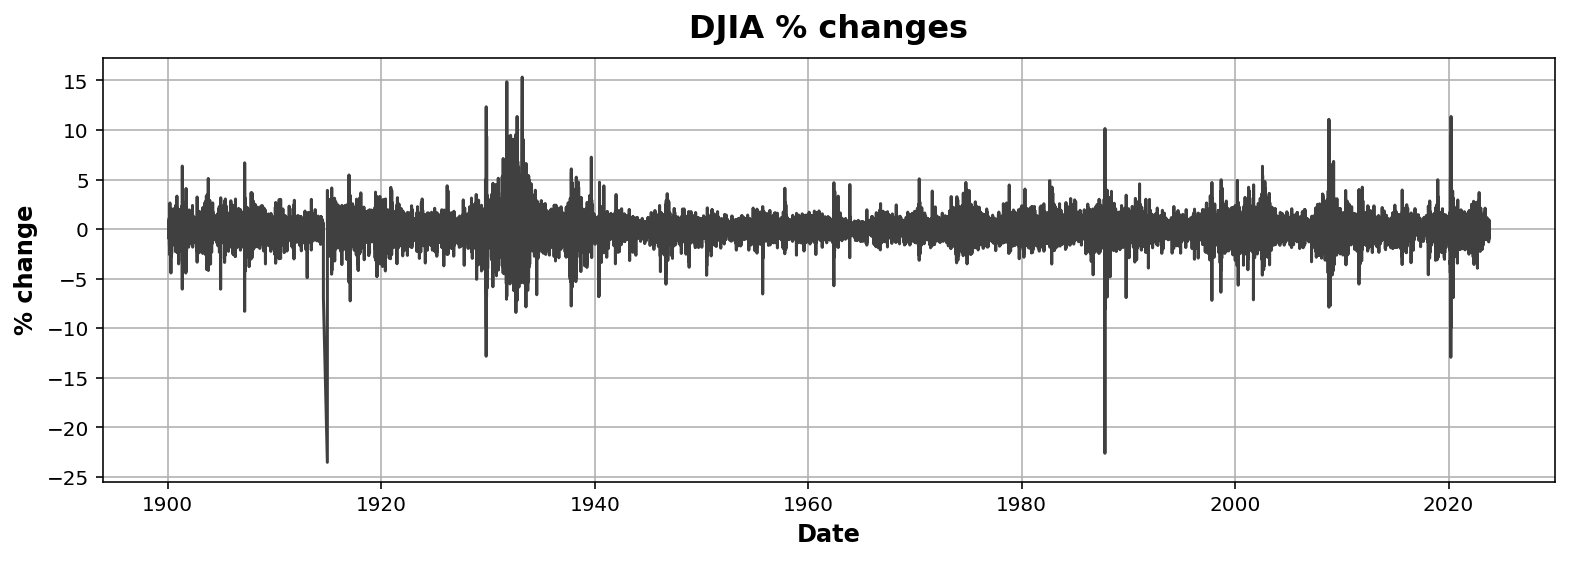

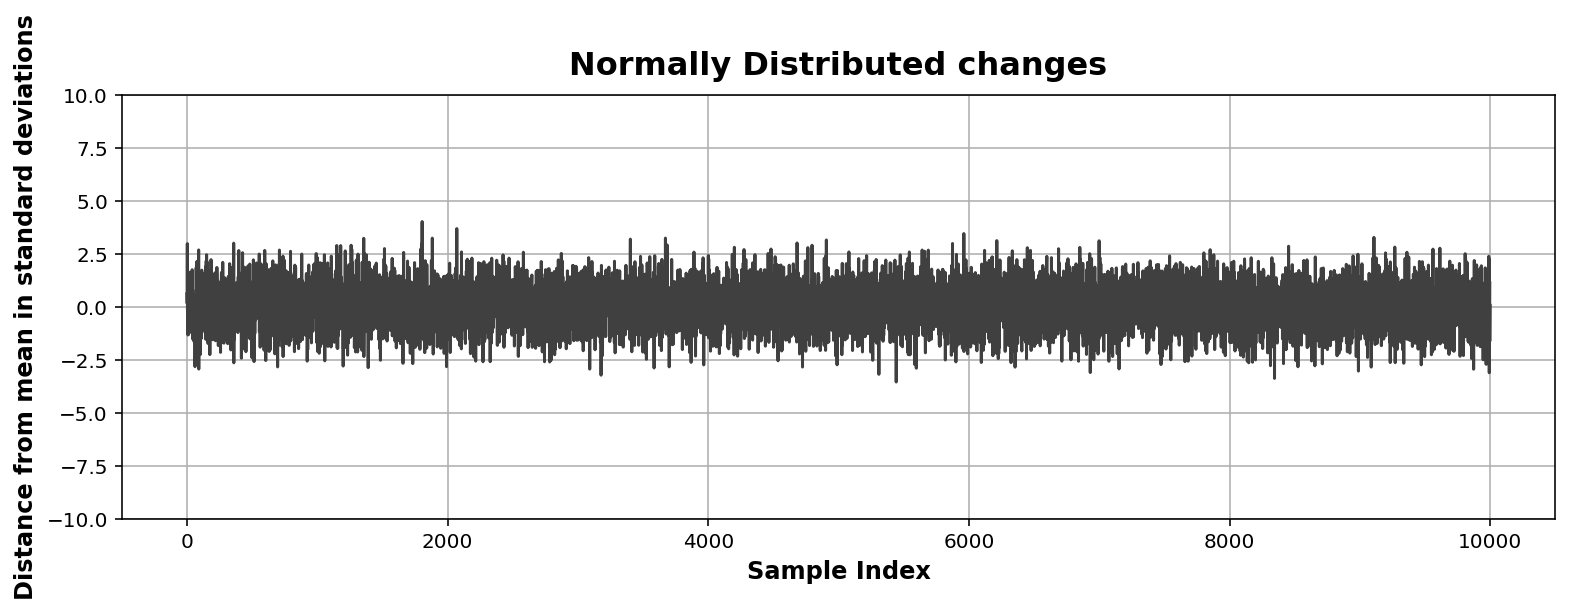

In [62]:
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('SP500 Date', 'Percent_change', data=df1, color='0.25')
ax.set_xlabel('Date')
ax.set_ylabel('% change')
ax.set_title('S&P 500 % changes')
plt.grid(True)

fig1, ax1 = plt.subplots()
ax1.plot('DJIA Date', 'Percent_change', data=df2, color='0.25')
ax1.set_xlabel('Date')
ax1.set_ylabel('% change')
ax1.set_title('DJIA % changes')
plt.grid(True)

# % change plot for a normal distribution
num_samples=10000

mean=0
std_dev=1

normal_samples=np.random.normal(loc=mean, scale=std_dev, size=num_samples)

plt.figure(figsize=(11, 4))
plt.plot(normal_samples, color='0.25')
plt.ylim(-10,10)
plt.xlabel('Sample Index')
plt.ylabel('Distance from mean in standard deviations')
plt.title('Normally Distributed changes')
plt.grid(True)
plt.show()

<Figure size 864x432 with 0 Axes>

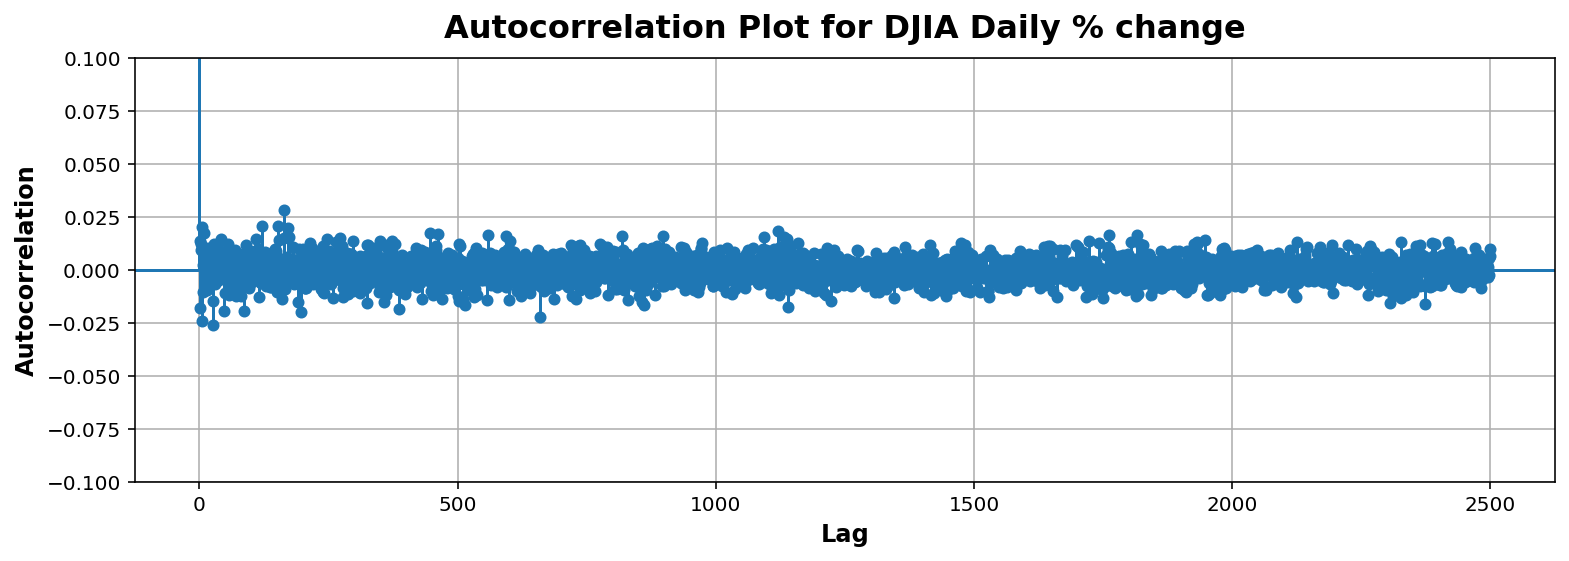

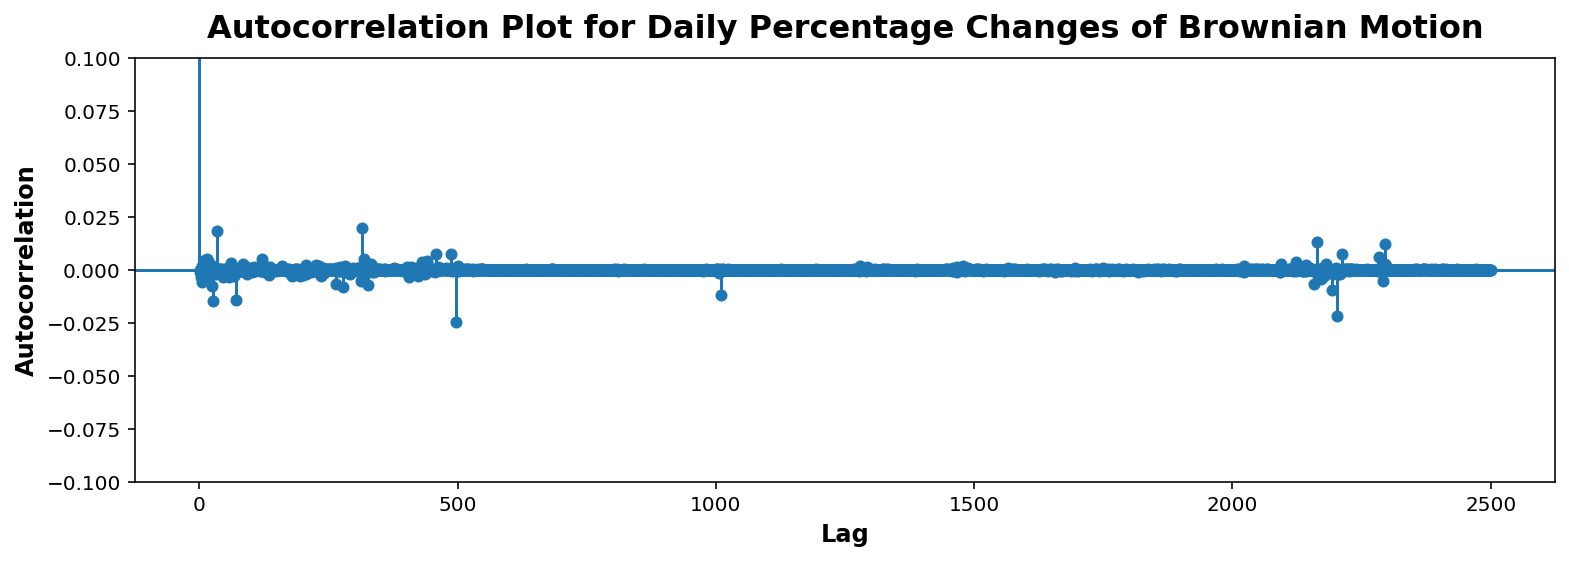

In [29]:
plt.figure(figsize=(12, 6))
plot_acf(df2['Percent_change'].dropna(), lags=2500, alpha=0.95, fft=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for DJIA Daily % change')
plt.ylim((-0.1,0.1))
plt.grid(True)
plt.show()

import statsmodels.api as sm

num_steps = 17000
brownian_motion1 = np.cumsum(np.random.normal(loc=0, scale=1, size=num_steps))
daily_percentage_changes = np.diff(brownian_motion1) / brownian_motion1[:-1] * 100

sm.graphics.tsa.plot_acf(daily_percentage_changes, lags=2500, fft=True, alpha=None)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for Daily Percentage Changes of Brownian Motion')
plt.ylim((-0.1,0.1))
plt.show()

Note that the sample Wiener processes shown before could, just by visual inspection, pass as the time series of a real market. But once we look at the daily percentage changes and the autocorrelation plots for the daily % changes, we see that the Brownian motion is a completely different process from that of the real world. 

(1) The autocorrelation for the % change in DJIA decays much more slowly than that for the Brownian motion. If this speed of decay is slower than exponential, then one can call it a persistent process, or one having long-memory. This can be investigated by calculating the Hurst exponent of the series. 

(2) The % change series are also markedly different. There are many more small and large changes in the real plots, and the large changes cluster together as opposed to the uniform spread in the Wiener process.

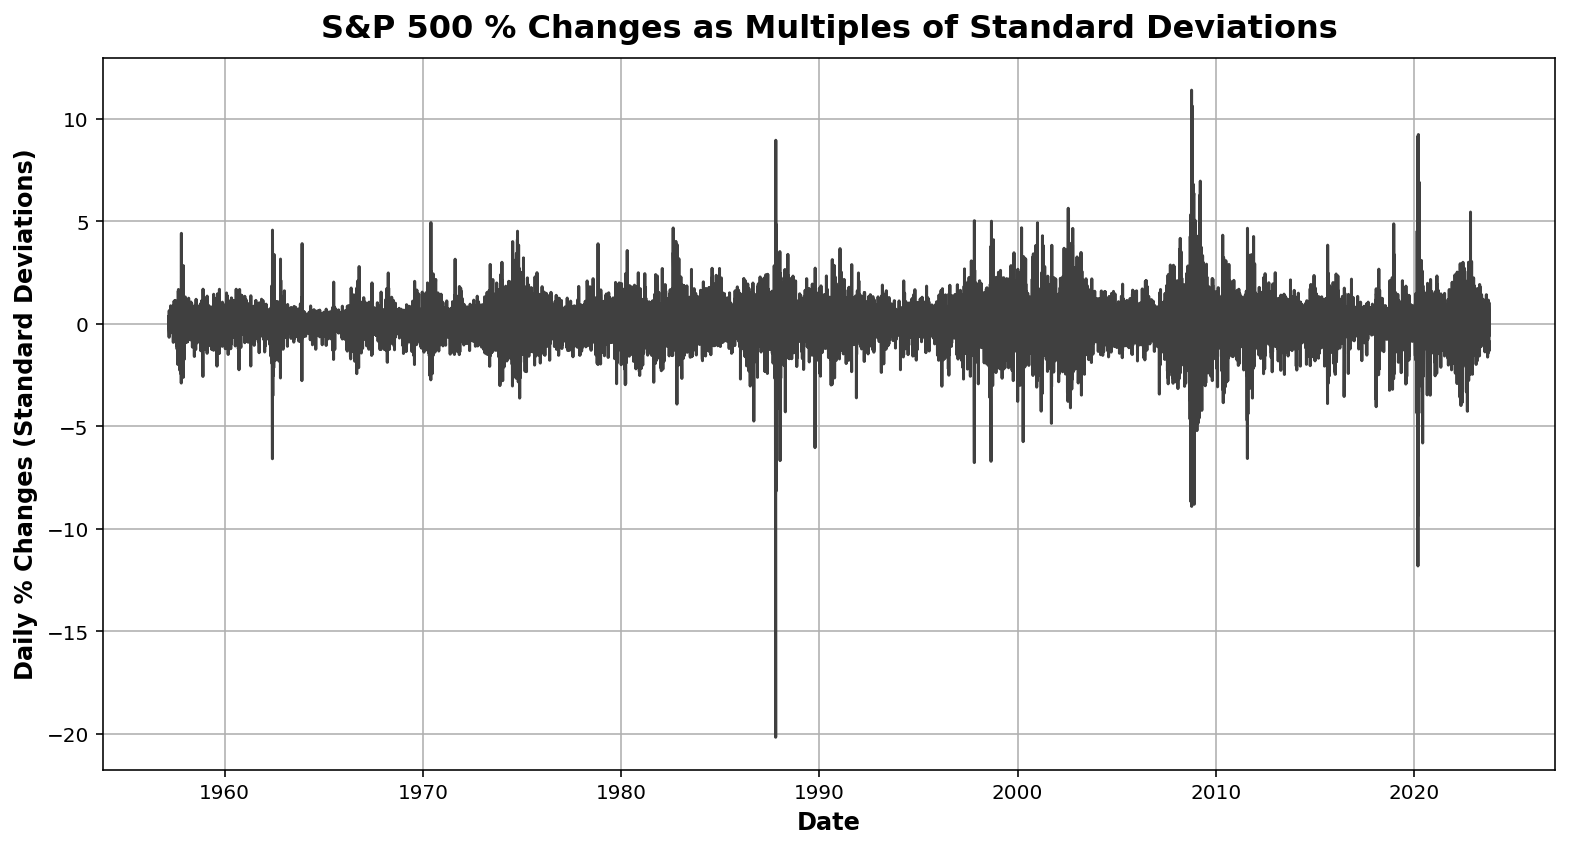

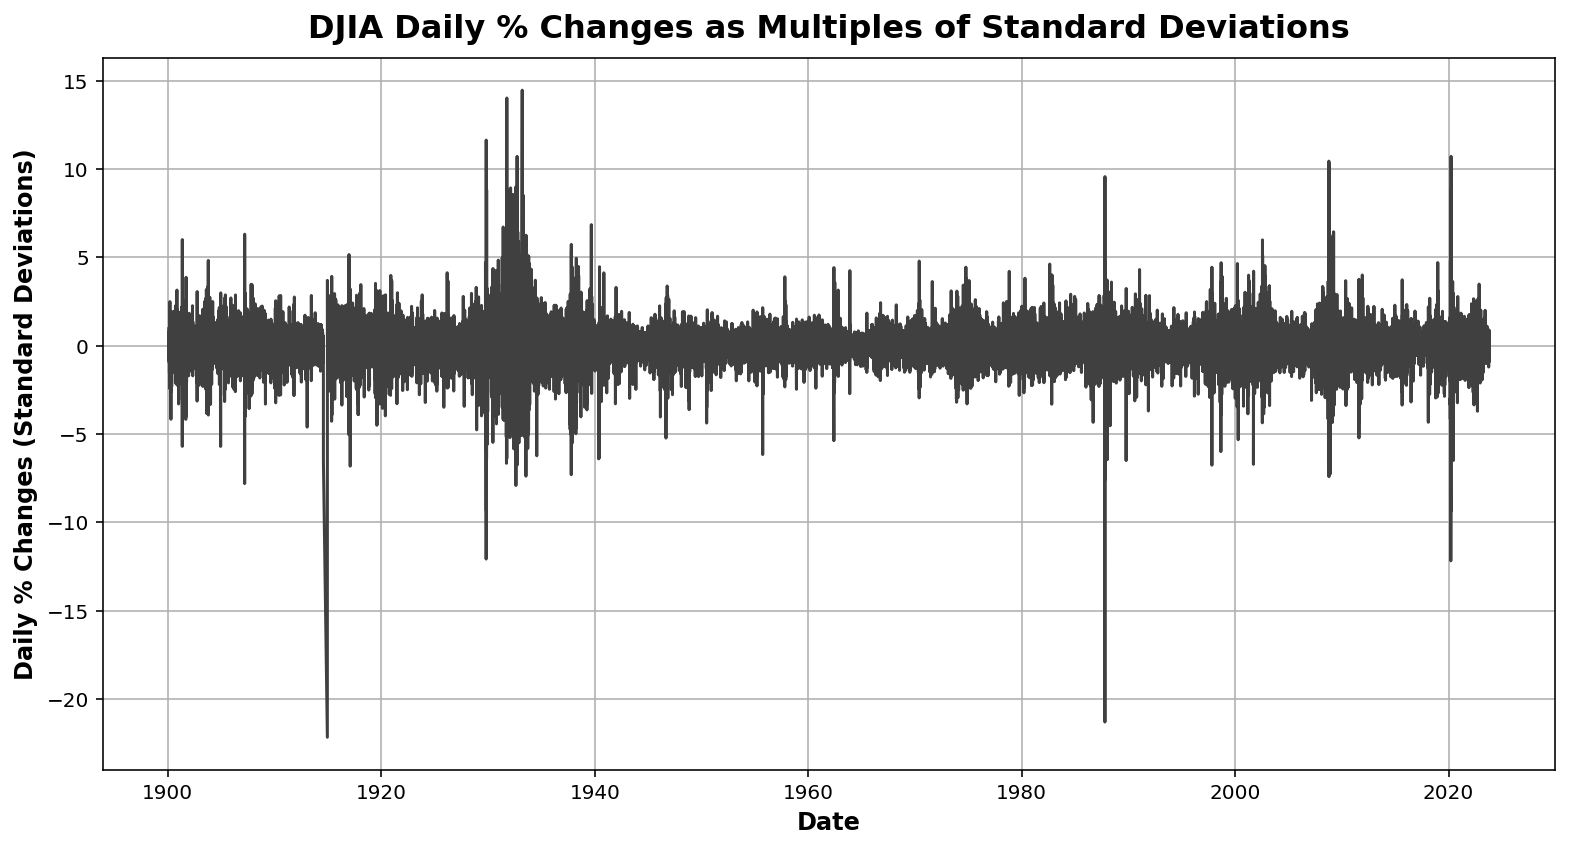

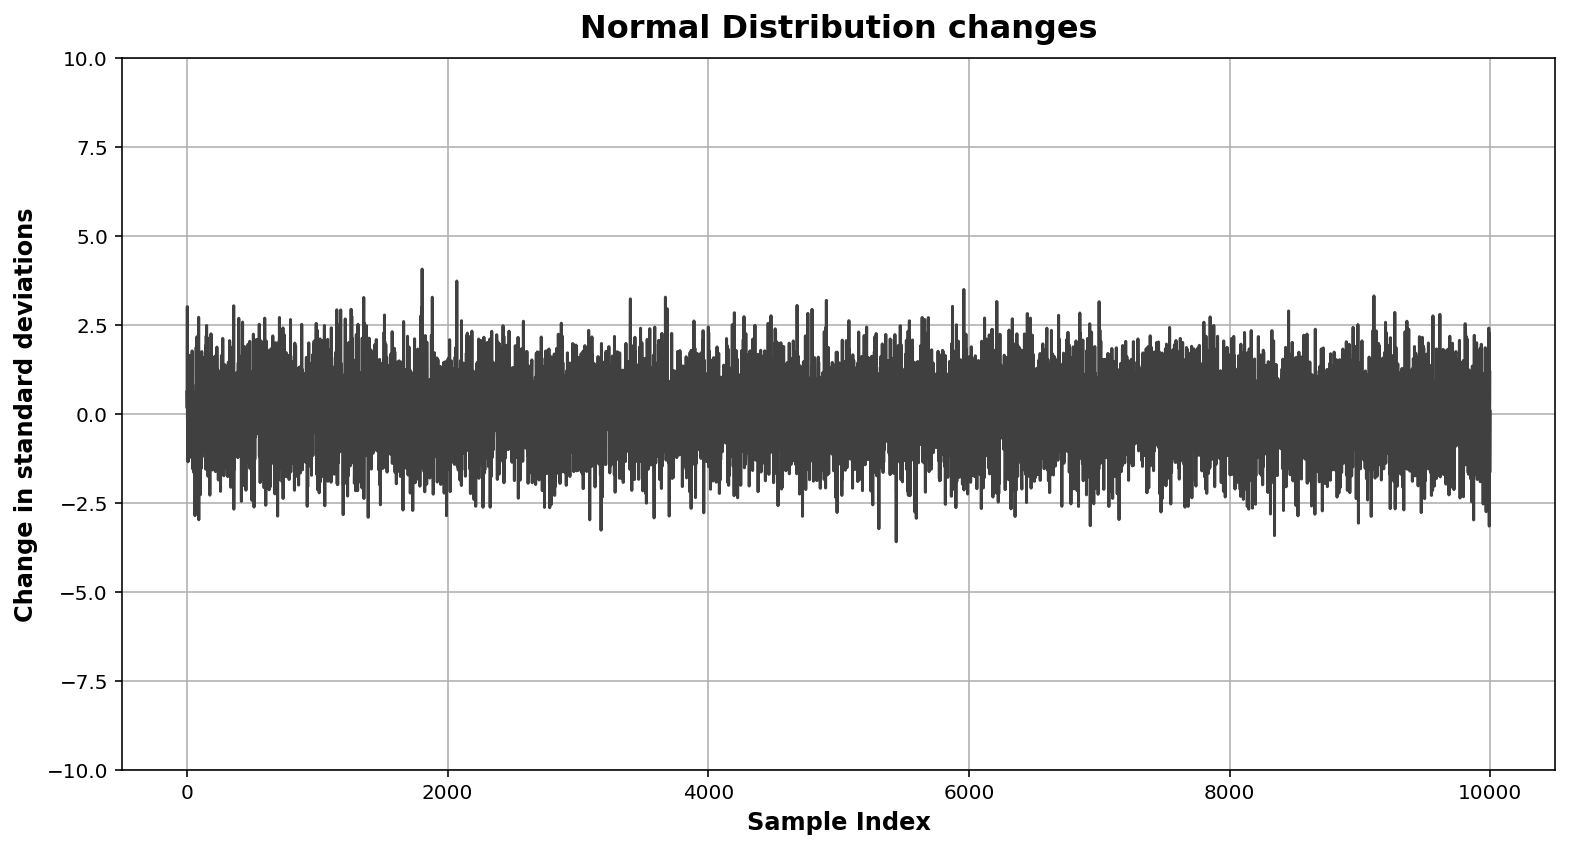

In [76]:
stdev1=df1['Percent_change'].std()

plt.figure(figsize=(11, 6))
plt.plot(df1['SP500 Date'][1:], df1['Percent_change'][1:]/stdev1, color='0.25')
plt.xlabel('Date')
plt.ylabel('Daily % Changes (Standard Deviations)')
plt.title('S&P 500 % Changes as Multiples of Standard Deviations')
plt.grid(True)
plt.show()

stdev2=df2['Percent_change'].std()

plt.figure(figsize=(11, 6))
plt.plot(df2['DJIA Date'][1:], df2['Percent_change'][1:]/stdev2, color='0.25')
plt.xlabel('Date')
plt.ylabel('Daily % Changes (Standard Deviations)')
plt.title('DJIA Daily % Changes as Multiples of Standard Deviations')
plt.grid(True)
plt.show()

stdev3=normal_samples.std()
plt.figure(figsize=(11, 6))
plt.plot(normal_samples/stdev3, color='0.25')
plt.xlabel('Sample Index')
plt.ylim(-10,10)
plt.ylabel('Change in standard deviations')
plt.title('Normal Distribution changes')
plt.grid(True)
plt.show()

Shown above are the changes in terms of number of standard deviations from the average change. Notice how docile the Wiener process is. One can calculate that 68% of the changes would take place within 1$\sigma$ from the average change and 99.73% within 3$\sigma$, where $\sigma$ is the value of the standard deviation of the normal distribution that the changes follow. In contrast, there are multiple changes above 5$\sigma$ in the real market plots and some even crossing 20$\sigma$.

Now let's see if there is a skew in the number of days with positive changes versus those with negative changes. We will be able to see it graphically further below by way of a histogram.

In [35]:
percent_threshold=list(range(1,11,1))
total_days=len(df1)

for threshold in percent_threshold:
    days_with_positive_change = df1[df1['Percent_change'] >= threshold]
    days_with_negative_change = df1[df1['Percent_change'] <= -1*threshold]
    count_of_positive_days = len(days_with_positive_change)
    count_of_negative_days = len(days_with_negative_change)
    fraction_positive_days=round(count_of_positive_days*100/total_days,2)
    fraction_negative_days=round(count_of_negative_days*100/total_days,2)
    print("No. of days with", threshold,"% or more change is", count_of_positive_days, "which is", fraction_positive_days, "% of the total and that with", -1*threshold,"% or more change is", count_of_negative_days, "which is", fraction_negative_days, "% of the total.")

No. of days with 1 % or more change is 1866 which is 11.12 % of the total and that with -1 % or more change is 1752 which is 10.44 % of the total.
No. of days with 2 % or more change is 398 which is 2.37 % of the total and that with -2 % or more change is 414 which is 2.47 % of the total.
No. of days with 3 % or more change is 119 which is 0.71 % of the total and that with -3 % or more change is 122 which is 0.73 % of the total.
No. of days with 4 % or more change is 54 which is 0.32 % of the total and that with -4 % or more change is 52 which is 0.31 % of the total.
No. of days with 5 % or more change is 23 which is 0.14 % of the total and that with -5 % or more change is 27 which is 0.16 % of the total.
No. of days with 6 % or more change is 12 which is 0.07 % of the total and that with -6 % or more change is 18 which is 0.11 % of the total.
No. of days with 7 % or more change is 7 which is 0.04 % of the total and that with -7 % or more change is 9 which is 0.05 % of the total.
No. o

In [36]:
percent_threshold=list(range(1,11,1))
total_days=len(df2)

for threshold in percent_threshold:
    days_with_positive_change = df2[df2['Percent_change'] >= threshold]
    days_with_negative_change = df2[df2['Percent_change'] <= -1*threshold]
    count_of_positive_days = len(days_with_positive_change)
    count_of_negative_days = len(days_with_negative_change)
    fraction_positive_days=round(count_of_positive_days*100/total_days,2)
    fraction_negative_days=round(count_of_negative_days*100/total_days,2)
    print("No. of days with", threshold,"% or more change is", count_of_positive_days, "which is", fraction_positive_days, "% of the total and that with", -1*threshold,"% or more change is", count_of_negative_days, "which is", fraction_negative_days, "% of the total.")

No. of days with 1 % or more change is 3896 which is 11.02 % of the total and that with -1 % or more change is 3738 which is 10.57 % of the total.
No. of days with 2 % or more change is 889 which is 2.51 % of the total and that with -2 % or more change is 1002 which is 2.83 % of the total.
No. of days with 3 % or more change is 303 which is 0.86 % of the total and that with -3 % or more change is 363 which is 1.03 % of the total.
No. of days with 4 % or more change is 133 which is 0.38 % of the total and that with -4 % or more change is 171 which is 0.48 % of the total.
No. of days with 5 % or more change is 69 which is 0.2 % of the total and that with -5 % or more change is 79 which is 0.22 % of the total.
No. of days with 6 % or more change is 39 which is 0.11 % of the total and that with -6 % or more change is 40 which is 0.11 % of the total.
No. of days with 7 % or more change is 22 which is 0.06 % of the total and that with -7 % or more change is 22 which is 0.06 % of the total.
N

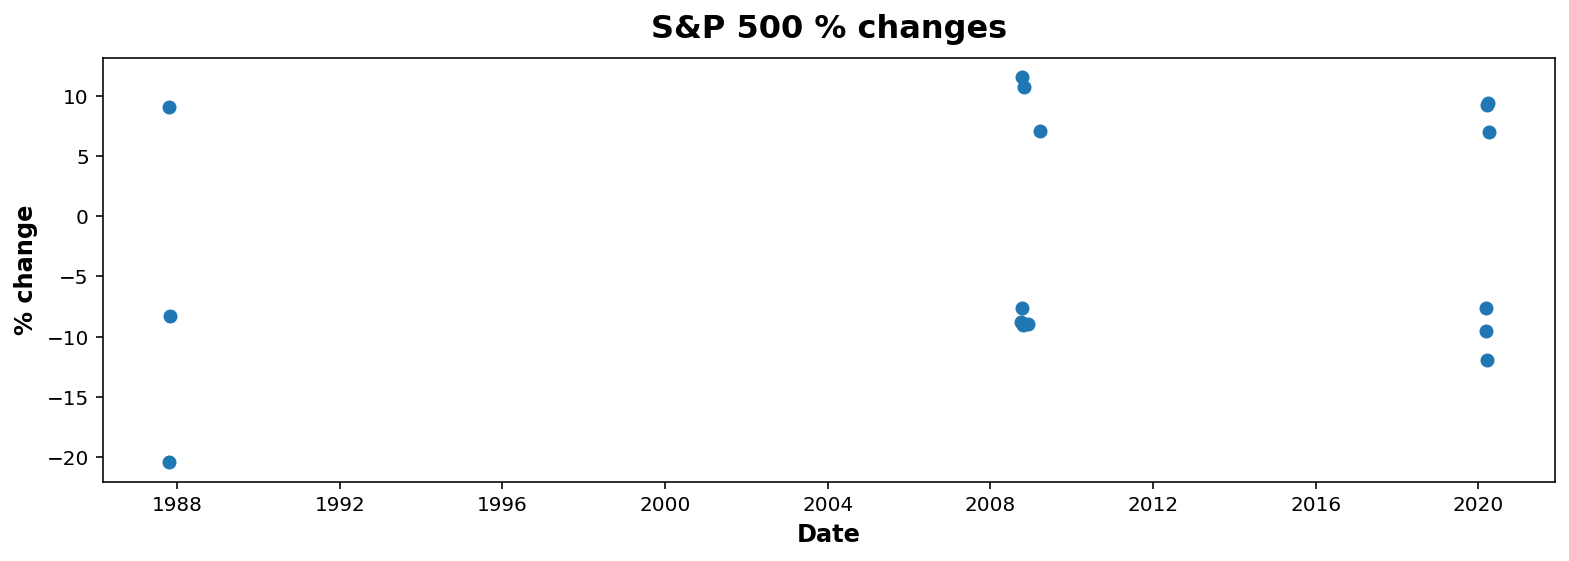

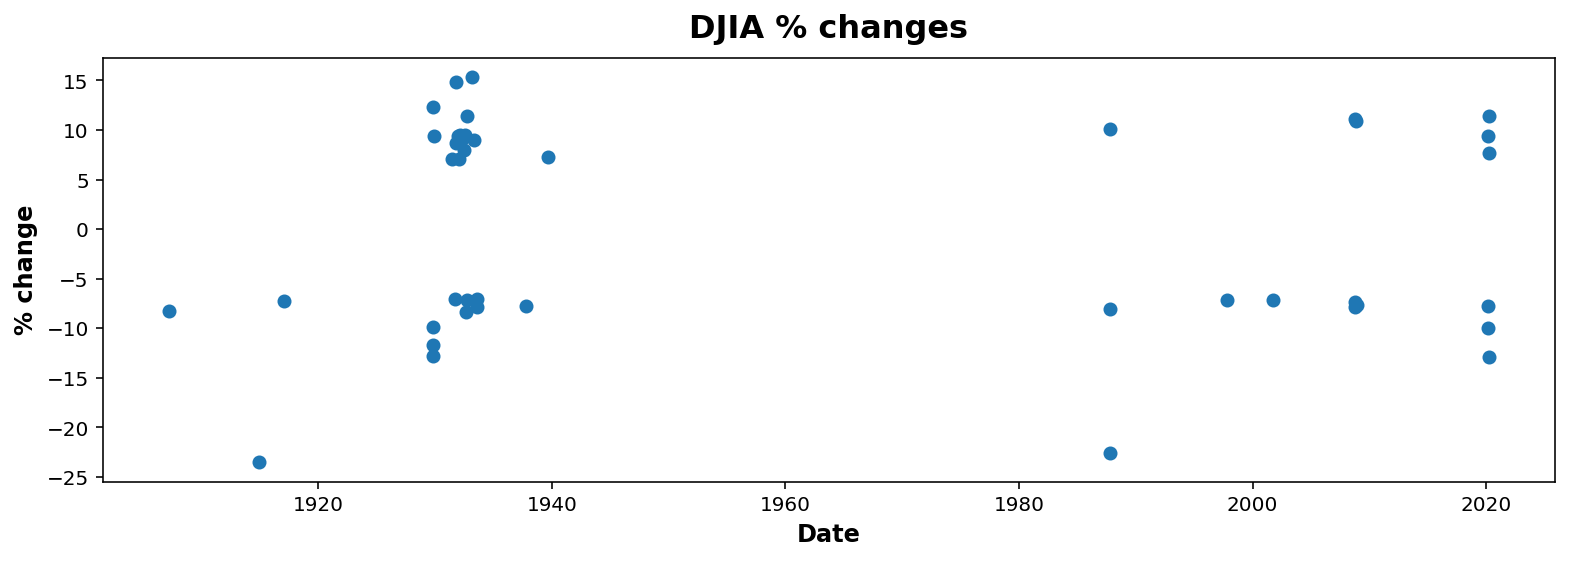

In [78]:
filtered_df1=df1[df1['Percent_change'].abs()>7]
fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_ylabel('% change')
ax.set_title('S&P 500 % changes')
ax.scatter('SP500 Date','Percent_change',data=filtered_df1,linestyle='None')

filtered_df2=df2[df2['Percent_change'].abs()>7]
fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_ylabel('% change')
ax.set_title('DJIA % changes')
ax.scatter('DJIA Date','Percent_change',data=filtered_df2,linestyle='None')

We see how the large changes tend to bunch up together. This phenomenon could not be expected from a process following a Gaussian distribution as it would have large and small changes uniformly distributed across time. Also, it should be noted that not all changes are equal. Assume a value of 100 for the index. A 10% fall followed by a 10% rise leads to a value of 99, a 1% loss. Similarly for a 10% rise followed by a 10% fall.

Having looked at percent changes, let's look at daily changes in log scale and absolute scale. The log scale puts the impact of larger events in prominence. Apparently larger absolute changes taking place in today's age may well be relatively unimportant when taken as a fraction of the price. For example, the COVID crash as seen from the absolute scale plot would make us think that it had the sharpest drawdown in history, but that is only because of the magnitude of price changes and not due its relative changes, which are shown in proportion to other major events, like the crash of 2008, Black Monday of 1987 or the Great Depression, by the percentage and log scale plots.

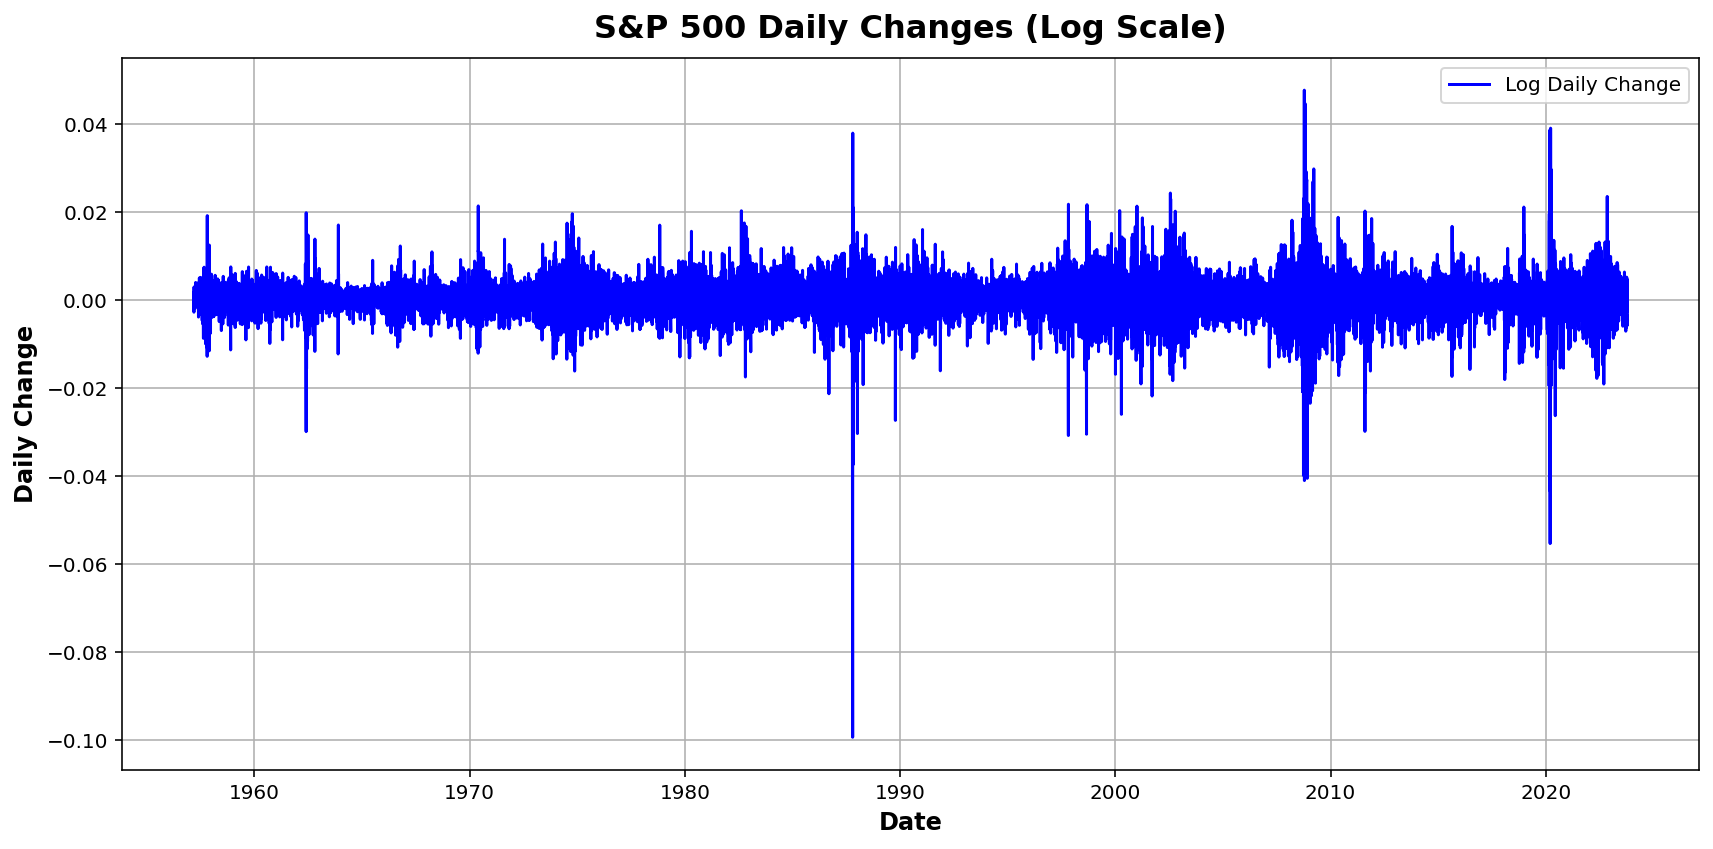

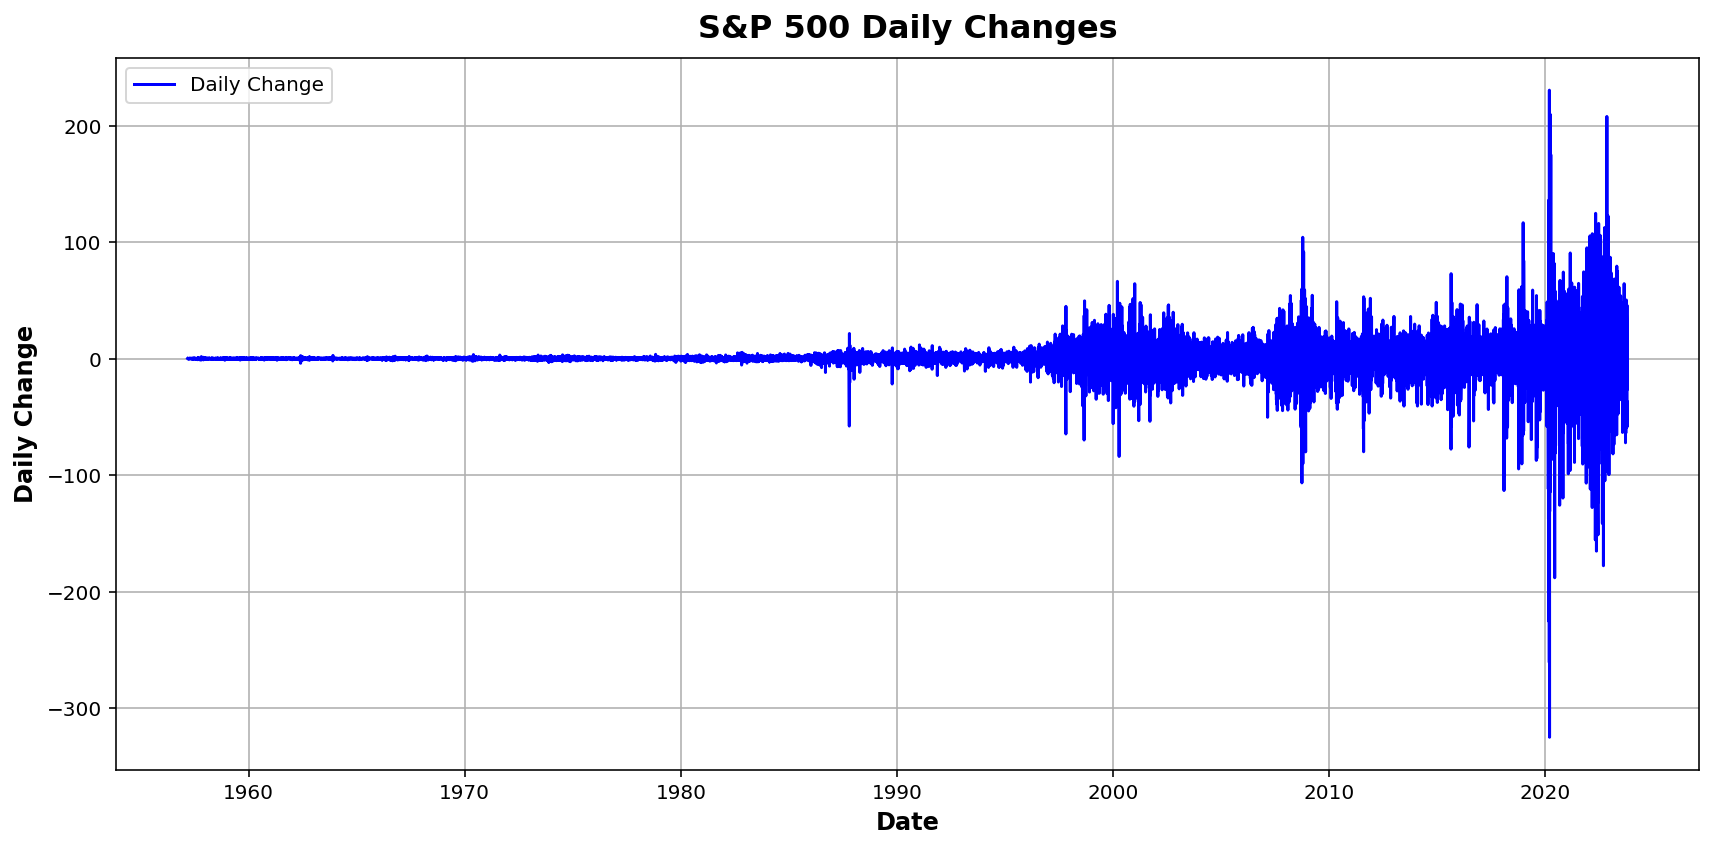

In [67]:
df1['Log_daily_change']=df1['SP500Log_price'].diff()
df1.dropna()

plt.figure(figsize=(12, 6))
plt.plot(df1['SP500 Date'], df1['Log_daily_change'], color='b', label='Log Daily Change')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.title('S&P 500 Daily Changes (Log Scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df1['Daily_change']=df1['SP500 Price'].diff()
df1.dropna()

plt.figure(figsize=(12, 6))
plt.plot(df1['SP500 Date'], df1['Daily_change'], color='b', label='Daily Change')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.title('S&P 500 Daily Changes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

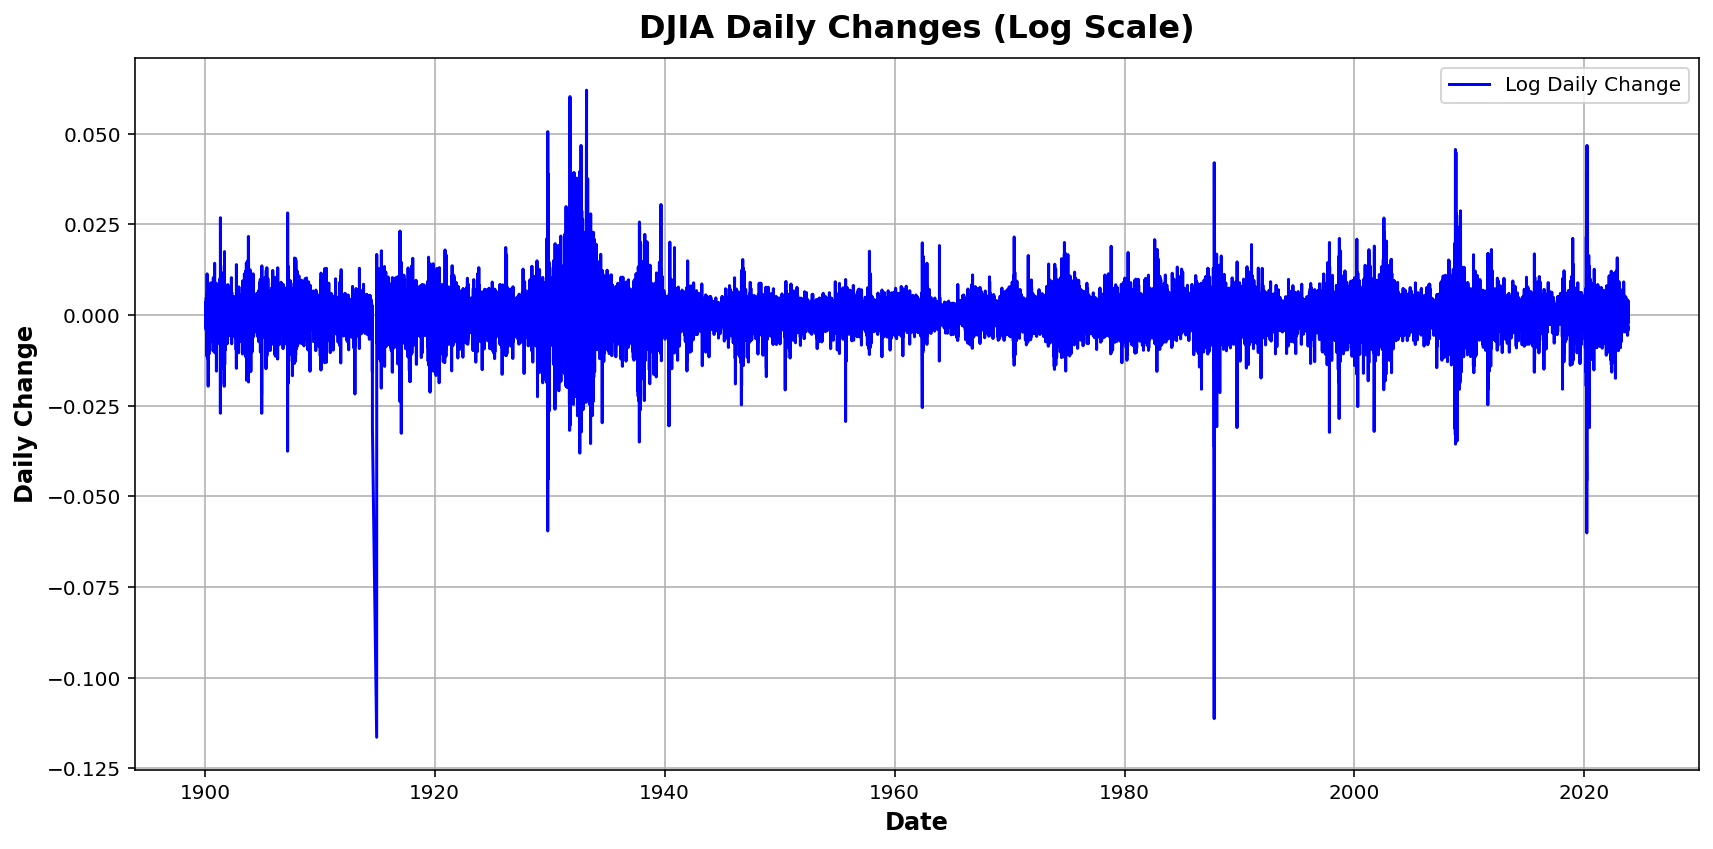

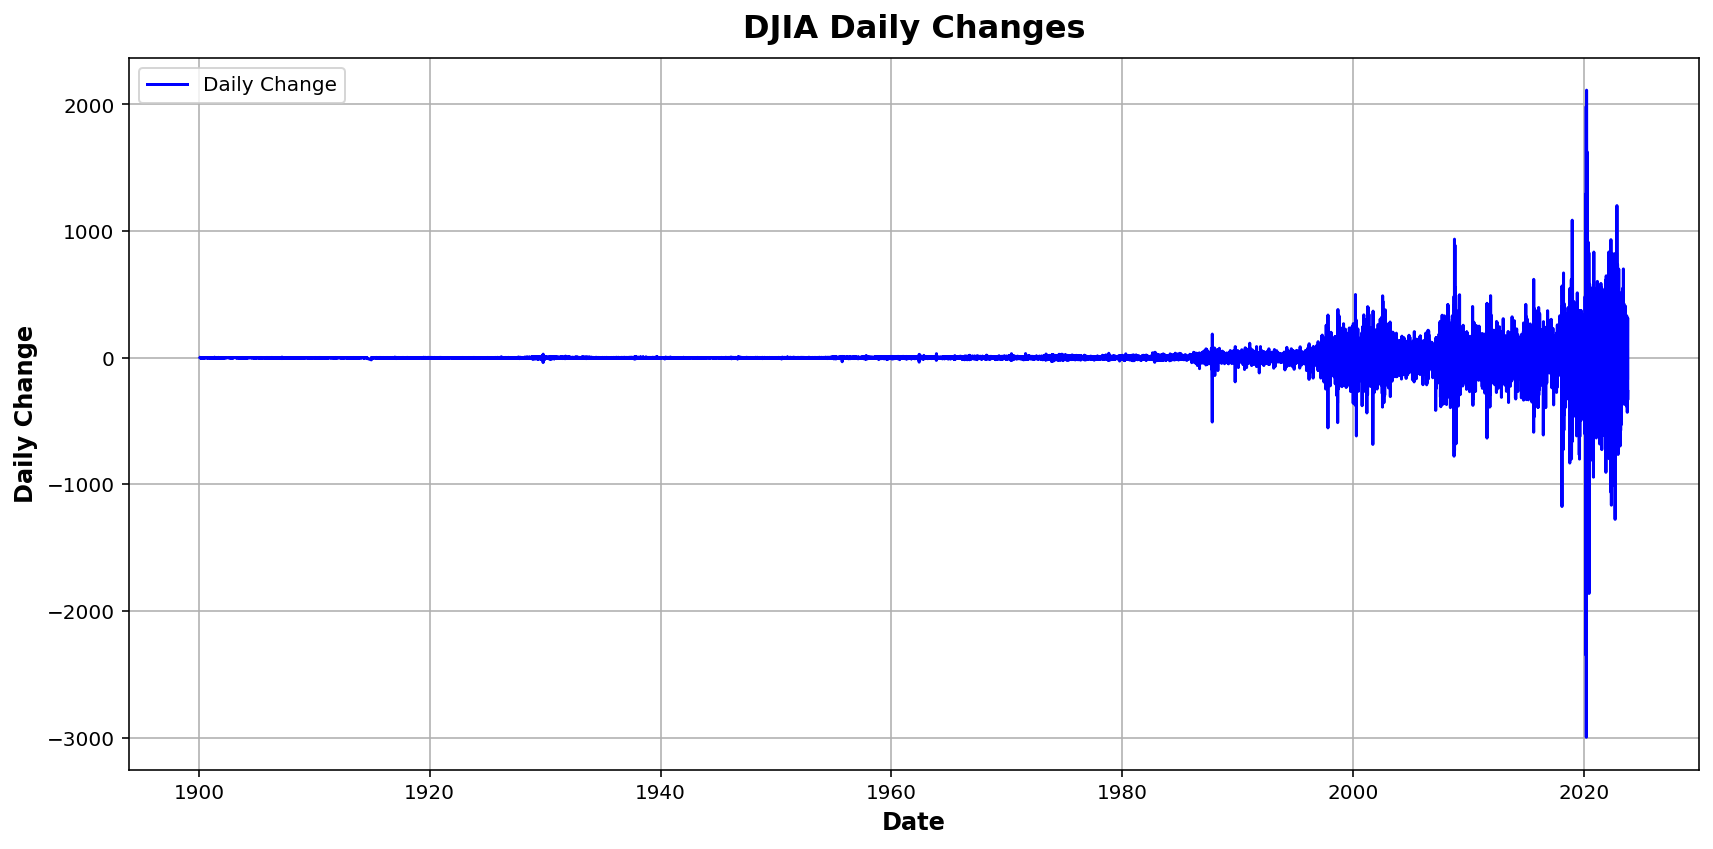

In [68]:
df2['Log_daily_change']=df2['DJIALog_price'].diff()
df2.dropna()

plt.figure(figsize=(12, 6))
plt.plot(df2['DJIA Date'], df2['Log_daily_change'], color='b', label='Log Daily Change')
plt.xlabel('Date')
plt.ylabel('Daily Change')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('DJIA Daily Changes (Log Scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df2['Daily_change']=df2['DJIA Price'].diff()
df2.dropna()

plt.figure(figsize=(12, 6))
plt.plot(df2['DJIA Date'], df2['Daily_change'], color='b', label='Daily Change')
plt.xlabel('Date')
plt.ylabel('Daily Change')
#plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('DJIA Daily Changes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Let's try to cast these two time series into probability distributions. We will work with daily changes and see what distribution they follow.

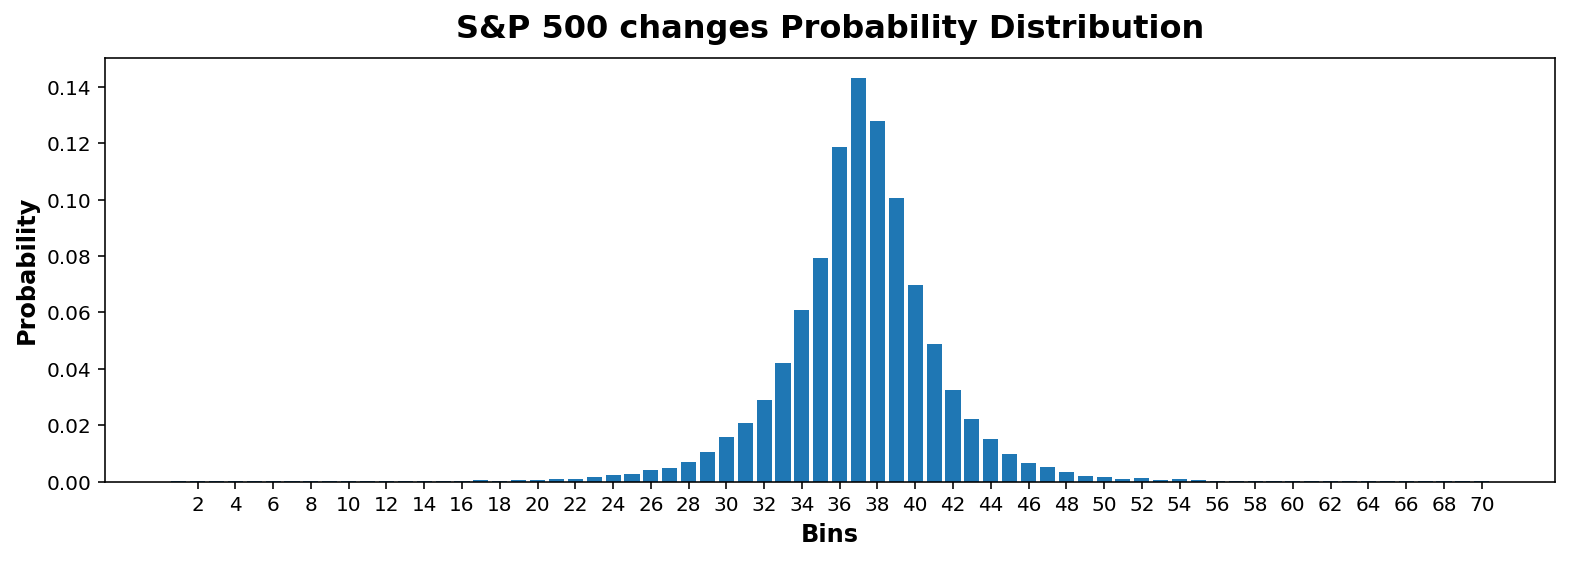

Skewness of the distribution: 2.685539894984588
Kurtosis of the distribution: 6.471593741546238


In [66]:
num_bins = 150

bin_labels = pd.cut(df1['Log_daily_change'], bins=num_bins, labels=False)
bin_counts = bin_labels.value_counts().sort_index()

total_count = len(bin_labels)
distribution1 = bin_counts / total_count

plt.bar(range(len(distribution1)), distribution1, align='center')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.title('S&P 500 changes Probability Distribution')
plt.xticks(range(1,len(distribution1),2), [f'{i+1}' for i in range(1,len(distribution1),2)])
plt.show()

from scipy.stats import skew
from scipy.stats import kurtosis

kurtosis_value1 = kurtosis(distribution1)

skewness1 = skew(distribution1)

print("Skewness of the distribution:", skewness1)
print("Kurtosis of the distribution:", kurtosis_value1)

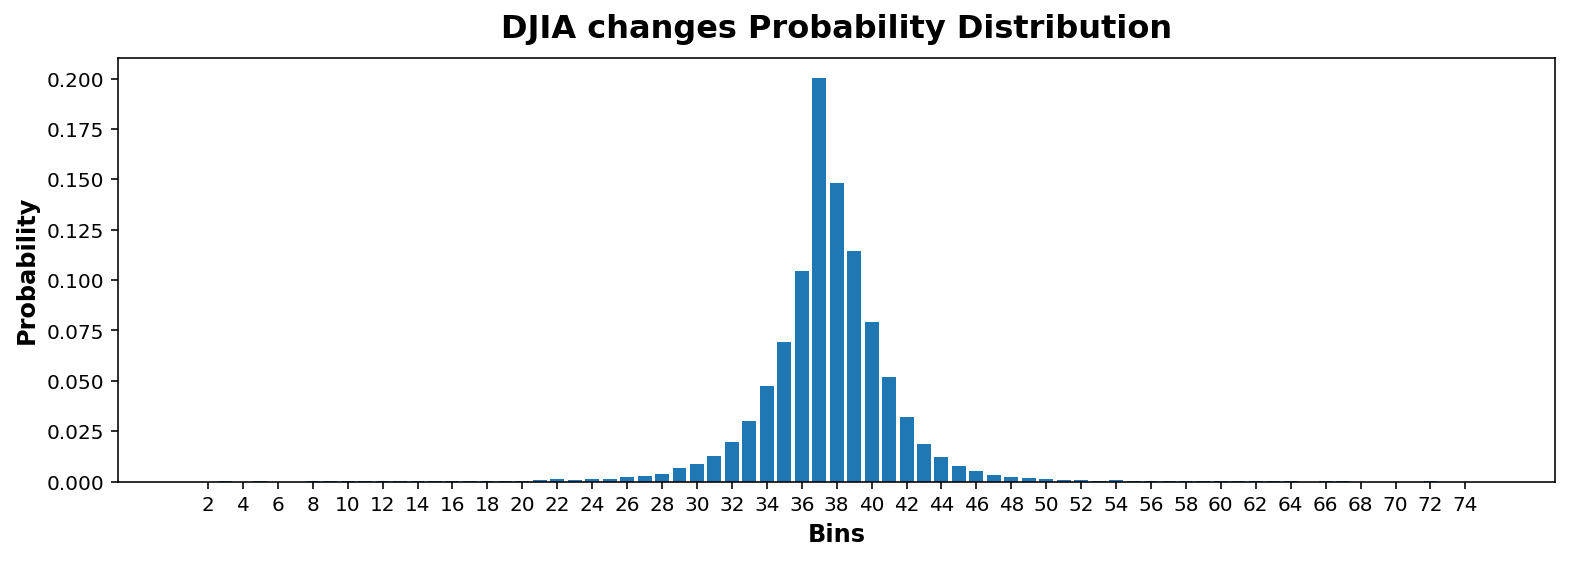

Skewness of the distribution: 3.48253712179734
Kurtosis of the distribution: 12.590996330540019


In [70]:
num_bins = 150

bin_labels = pd.cut(df2['Log_daily_change'], bins=num_bins, labels=False)
bin_counts = bin_labels.value_counts().sort_index()

total_count = len(bin_labels)
distribution2 = bin_counts / total_count

plt.bar(range(len(distribution2)), distribution2, align='center')
plt.xlabel('Bins')
plt.ylabel('Probability')
plt.title('DJIA changes Probability Distribution')
plt.xticks(range(1,len(distribution2),2), [f'{i+1}' for i in range(1,len(distribution2),2)])
plt.show()

from scipy.stats import skew
from scipy.stats import kurtosis

kurtosis_value2 = kurtosis(distribution2)

skewness2 = skew(distribution2)

print("Skewness of the distribution:", skewness2)
print("Kurtosis of the distribution:", kurtosis_value2)

As shown above, there is considerable skew and kurtosis, which is further confirmation that these price changes are not normally distributed. The Dow kurtosis is almost twice that of the S&P 500 which could be because of the larger dataset due to which more number of extreme events were captured, whose large 4th moments contributed to making its kurtosis bigger.